# Superstore Dataset Analysis
In this notebook, we explore the Superstore dataset using various data analysis techniques. The aim is to extract meaningful insights through exploratory data analysis (EDA), data cleaning, and visualization.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid", palette="Set2")  # Use Seaborn's built-in themes

In [22]:
# Load the dataset
# Note: While loading datasets, encoding issues might occur due to variations in character encoding formats.
# To handle such issues, we specify the encoding explicitly. If the dataset still raises errors, we can 
# experiment with other encodings like 'ISO-8859-1' or 'cp1252'.

file_path = 'Sample - Superstore.csv'  
try:
    # Attempt to load the dataset with default encoding
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    # Handle encoding errors by specifying an alternative encoding
    print("Encoding error detected. Attempting to load with 'latin1' encoding.")
    df = pd.read_csv(file_path, encoding='latin1')

# Display the first 5 rows to confirm successful loading
df.head()


Encoding error detected. Attempting to load with 'latin1' encoding.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Summary statistics for numerical columns

In [23]:
# Inspect data structure
df.info()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Row ID', 'Postal Code'])
numerical_columns.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Check for missing values and duplicates

In [24]:
# Check for missing values
df.isnull().sum()

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [33]:
# Drop rows with missing values (if necessary)
df = df.dropna()

# Confirm no missing values remain
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [34]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm no duplicates remain
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


In [75]:
# Convert 'Order Date' and 'Ship Date' columns to datetime if present
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Boxplot for visualizing outliers in numeric columns

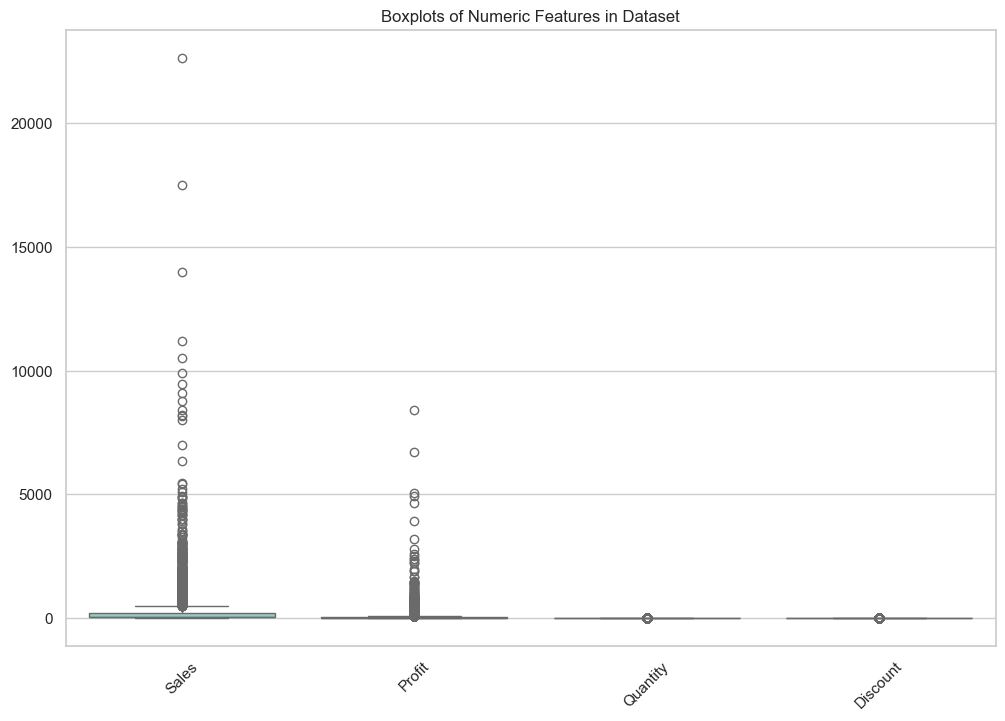

In [93]:
# Boxplot for visualizing outliers in numeric columns
plt.figure(figsize=(12, 8))

# Only plot numeric columns
sns.boxplot(data=numeric_cols, palette="Set3")
plt.title('Boxplots of Numeric Features in Dataset')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### Logarithmic Scaling for Better Visualization

Logarithmic scaling is applied to numeric features to handle large value ranges and improve visualization. This transformation compresses large values (e.g., `Sales` and `Profit`) while preserving smaller ones (`Quantity` and `Discount`), making all features more comparable. 


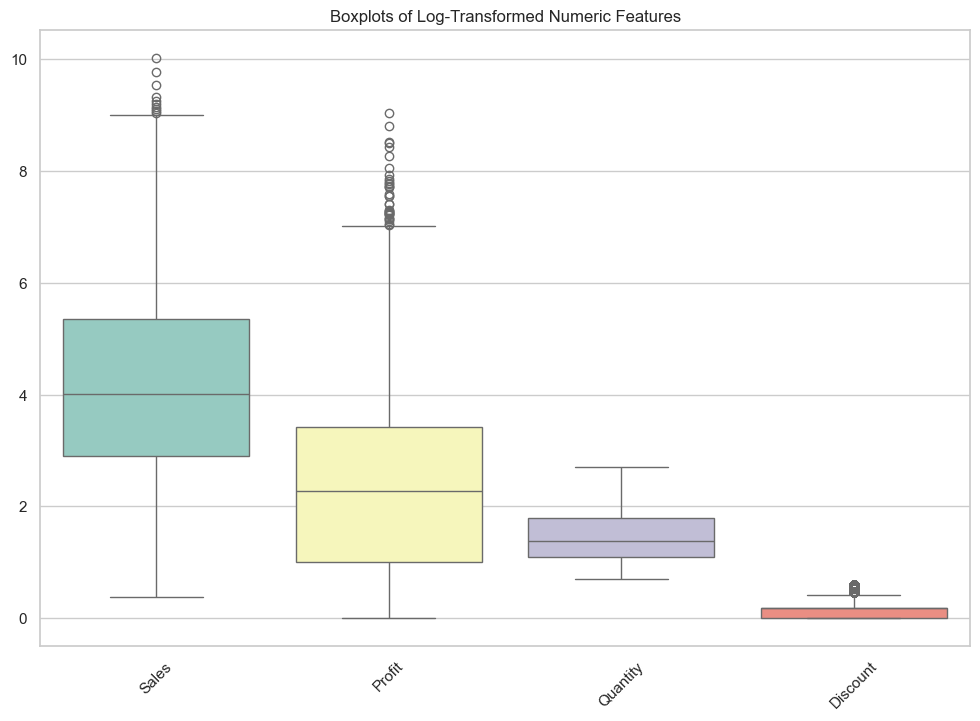

In [94]:
# Logarithmic Scaling for Improved Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=log_transformed, palette="Set3")
plt.title('Boxplots of Log-Transformed Numeric Features')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


# Scatter Plot Matrix
A pairplot visualizes relationships between numeric features ('Sales', 'Quantity', 'Discount', 'Profit') with 'Category' as the hue, using kernel density estimation (KDE) for diagonal plots.

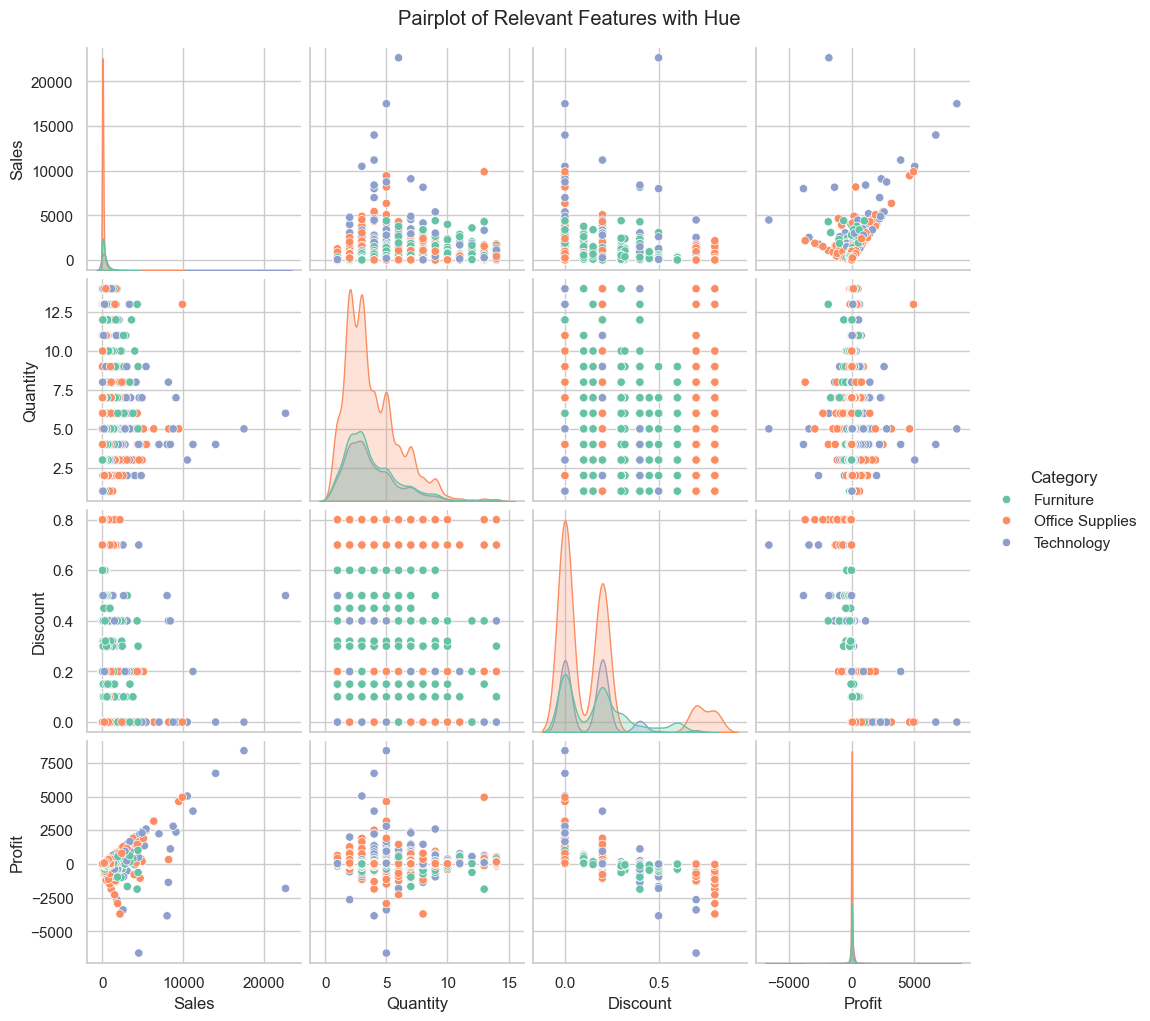

In [95]:
# Specify relevant numeric columns and a categorical column for hue
relevant_columns = ['Sales', 'Quantity', 'Discount', 'Profit']  
hue_column = 'Category'

# Create the pairplot with hue
sns.pairplot(df[relevant_columns + [hue_column]], diag_kind='kde', hue=hue_column, palette="Set2")
plt.suptitle('Pairplot of Relevant Features with Hue', y=1.02)
plt.show()

# Identifying potential outliers using z-score

In [64]:
# Calculate z-scores for numeric columns only
z_scores = np.abs(stats.zscore(numeric_cols))

# Set a customizable threshold for outliers (e.g., z > 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

print(f"\nPotential outliers based on z-score (z > {threshold}):")
print(df[outliers].head())

# Optionally display the count of outliers
print(f"\nNumber of rows with potential outliers: {outliers.sum()}")


Potential outliers based on z-score (z > 3):
     Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
14       15  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
15       16  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
27       28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
75       76  US-2017-118038 2017-12-09 2017-12-11     First Class    KB-16600   
101     102  CA-2016-158568 2016-08-29 2016-09-02  Standard Class    RB-19465   

       Customer Name      Segment        Country          City  ...  \
14     Harold Pawlan  Home Office  United States    Fort Worth  ...   
15     Harold Pawlan  Home Office  United States    Fort Worth  ...   
27   Tracy Blumstein     Consumer  United States  Philadelphia  ...   
75       Ken Brennan    Corporate  United States       Houston  ...   
101     Rick Bensley  Home Office  United States       Chicago  ...   

    Quantity_cubed  Discount_log Discoun

# Distribution of sales and Count of categories

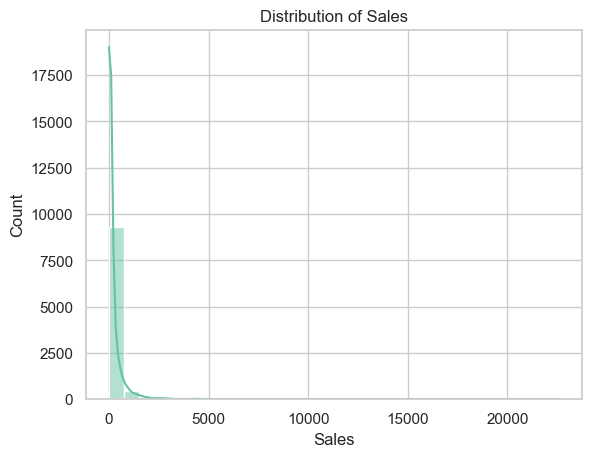

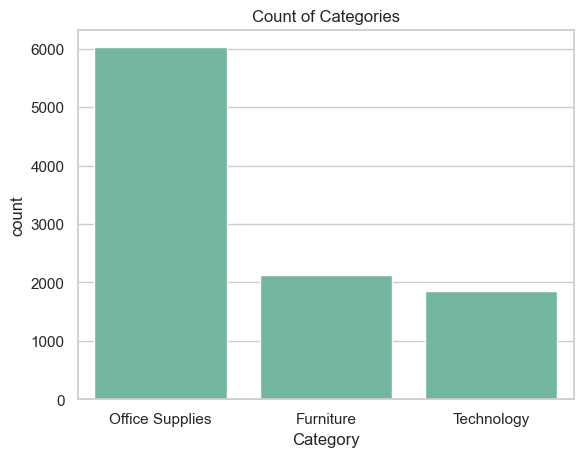

In [96]:
# Distribution of sales
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.show()

# Count of categories
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Count of Categories')
plt.show()

# Correlation heatmap for relevant features

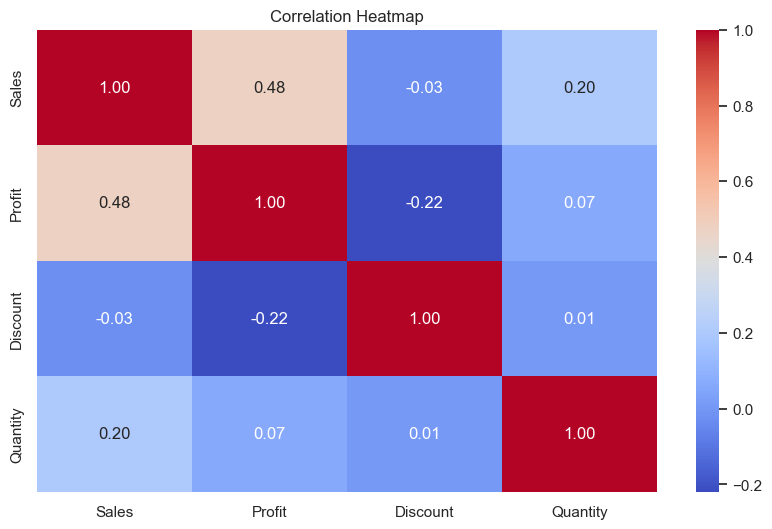

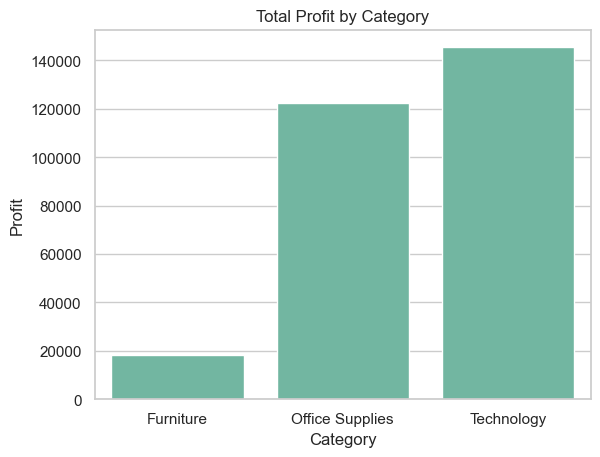

In [97]:
# Select only relevant numerical columns
relevant_cols = ['Sales', 'Profit', 'Discount', 'Quantity']  # Adjust based on your dataset
numerical_cols = df[relevant_cols]

# Correlation heatmap for relevant features
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Profit by Category
if 'Profit' in df.columns and 'Category' in df.columns:
    category_profit = df.groupby('Category', as_index=False)['Profit'].sum()
    sns.barplot(data=category_profit, x='Category', y='Profit')
    plt.title('Total Profit by Category')
    plt.show()
else:
    print("Columns 'Profit' or 'Category' are missing in the dataset.")


# Profit margin calculation

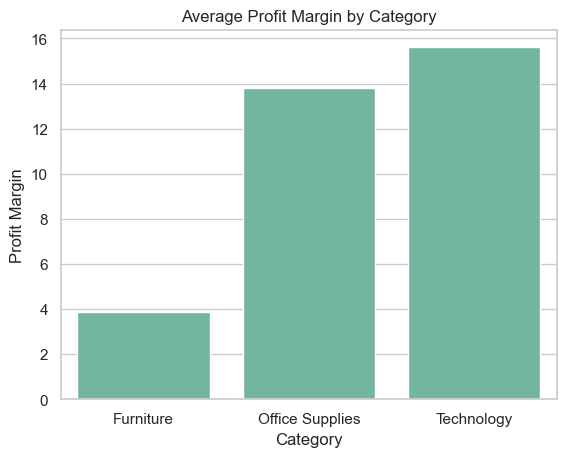

In [98]:
# Profit margin calculation
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Average profit margin by Category
profit_margin = df.groupby('Category')['Profit Margin'].mean().reset_index()
sns.barplot(data=profit_margin, x='Category', y='Profit Margin')
plt.title('Average Profit Margin by Category')
plt.show()

# Sales trend over months

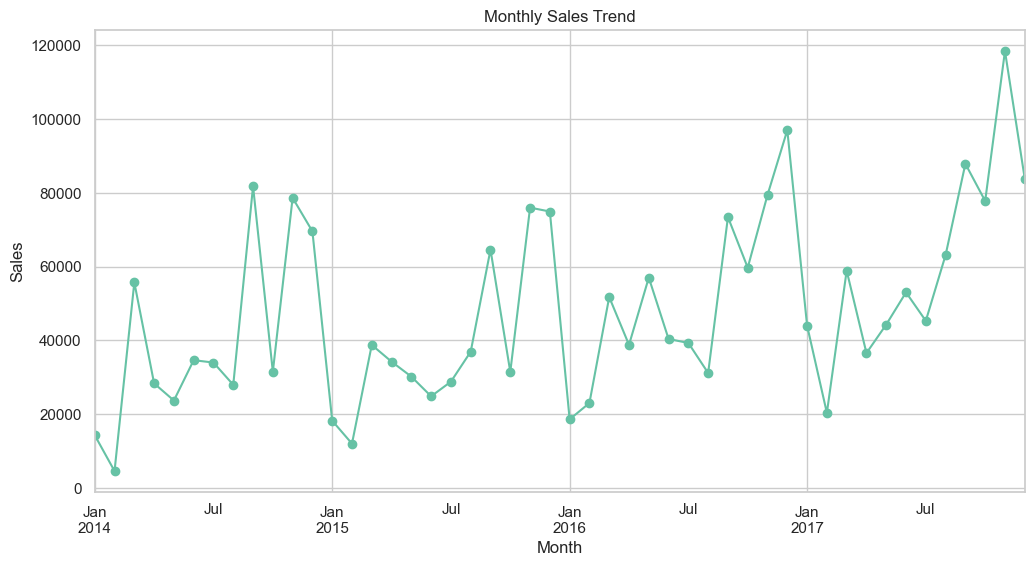

In [99]:
# Sales trend over months
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()


# Sales by Region

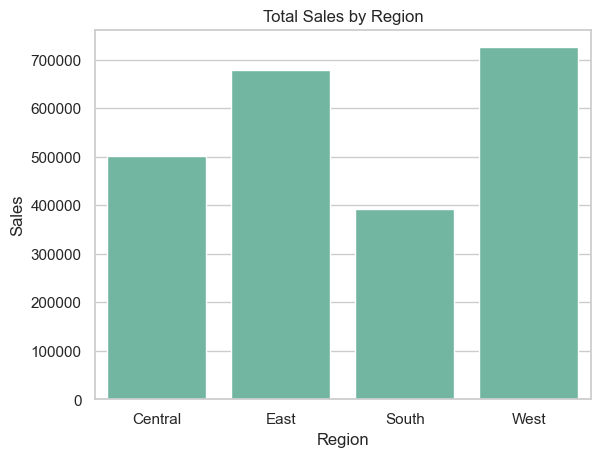

In [100]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Total Sales by Region')
plt.show()

In [101]:
# Save the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Superstore.csv', index=False)

# Feature Engineering for Meaningful Insights

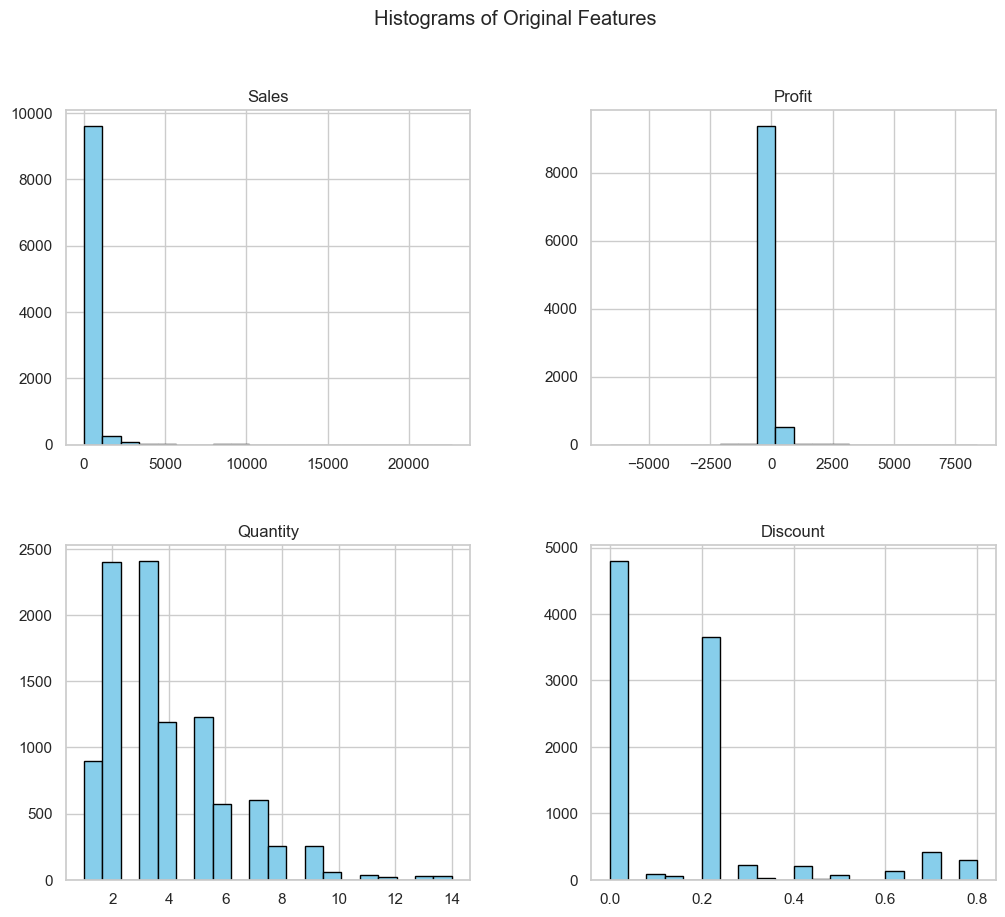

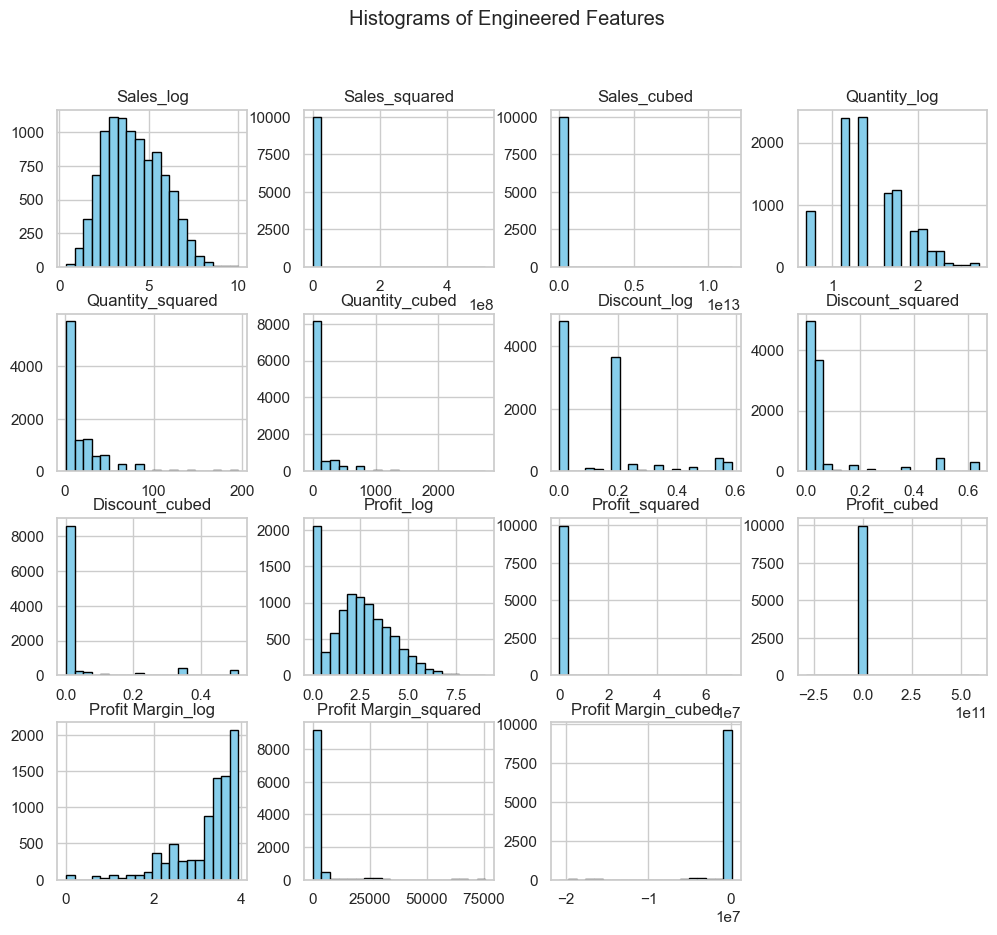


Dataset with New Features:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Quantity_cubed  Discount_log Discount_squared Discount_cubed Profit_log  \

In [102]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number'])

# Define meaningful columns 
meaningful_columns = ['Sales', 'Profit', 'Quantity', 'Discount'] 
numeric_cols = numeric_cols[meaningful_columns]

# Create new features based on skewness and kurtosis insights
for column in numeric_cols.columns:
    # Apply log transformation for highly skewed features
    if abs(numeric_cols[column].skew()) > 0.5:
        new_col_name_log = f'{column}_log'
        df[new_col_name_log] = np.log1p(df[column].clip(lower=0.0001))  # Clip to avoid negative/zero values

    # Create squared and cubed features for high kurtosis
    if numeric_cols[column].kurtosis() > 1:
        new_col_name_squared = f'{column}_squared'
        new_col_name_cubed = f'{column}_cubed'
        df[new_col_name_squared] = df[column] ** 2
        df[new_col_name_cubed] = df[column] ** 3

# Visualize histograms of meaningful features with proper scaling
df[meaningful_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Original Features')
plt.show()

# Visualize histograms of newly engineered features
engineered_columns = [col for col in df.columns if any(key in col for key in ['_log', '_squared', '_cubed'])]
df[engineered_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Engineered Features')
plt.show()

# Print the first few rows of the dataset with new features
print("\nDataset with New Features:")
print(df.head())
